c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


[0 0 1]


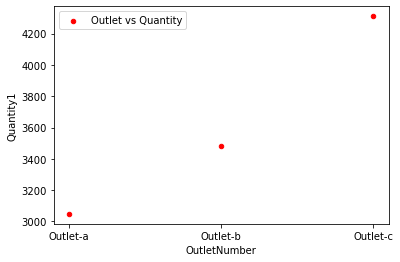

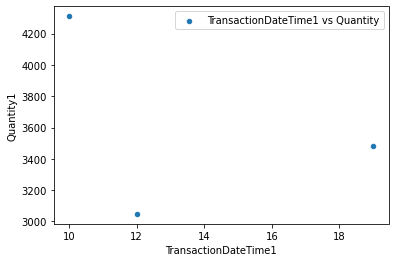

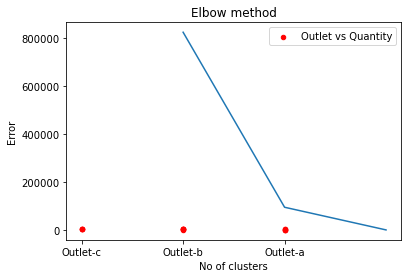

[0 0 1]
[1 0 1]


In [1]:
import pandas as pd
import numpy as np
import TradeArea_2 as t2 # importing other trade areas data 
import TradeArea_3 as t3
import TradeArea_4 as t4
%matplotlib inline

In [2]:
df1 = pd.read_csv('Outlet-1.csv') # Reading Data
df2 = pd.read_csv('Outlet-2.csv')
df3 = pd.read_csv('Outlet-3.csv')
df4 = pd.read_csv('Outlet-4.csv')

df1 = df1.head(66238)
df2 = df2.head(31486)
df3 = df3.head(16754)
df4 = df4.head(19155)

# Converting to datetime datatype
df1['TransactionDateTime1'] = pd.to_datetime(df1['TransactionDateTime1'], infer_datetime_format=True) 
df2['TransactionDateTime1'] = pd.to_datetime(df2['TransactionDateTime1'], infer_datetime_format=True)
df3['TransactionDateTime1'] = pd.to_datetime(df3['TransactionDateTime1'], infer_datetime_format=True)
df4['TransactionDateTime1'] = pd.to_datetime(df4['TransactionDateTime1'], infer_datetime_format=True)
df1.head()

c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,TransactionID2,OutletNumber,PumpNumber1,NozzleNumber1,Product1,Price1,Quantity1,Amount1,TransactionDateTime1,UpdatedDate,TransactionType1,VehicleNumber1,MobileNumber1,SMSSent,ReceiptPrinted1,TotalizerQuantityStart1,TotalizerQuantityEnd1,Textbox107,Textbox112,Textbox113
0,1053130894,Outlet-1,26,1,MS,100.53,1.99,200.0,2021-05-31 23:58:00,31-05-2021 23:58,Cash,NaN,NaN,No,No,1477114.33,1477116.32,200767,1102346.7,107680966.1
1,1053133512,Outlet-1,29,1,MS,100.53,0.99,100.0,2021-05-31 23:58:00,31-05-2021 23:58,Cash,NaN,NaN,No,No,1216590.71,1216591.70,200767,1102346.7,107680966.1
2,1053130893,Outlet-1,26,1,MS,100.53,1.99,200.0,2021-05-31 23:57:00,31-05-2021 23:57,Cash,NaN,NaN,No,No,1477112.34,1477114.33,200767,1102346.7,107680966.1
3,1053128020,Outlet-1,24,1,MS,100.53,2.98,300.0,2021-05-31 23:56:00,31-05-2021 23:56,Cash,NaN,NaN,No,No,1900878.93,1900881.91,200767,1102346.7,107680966.1
4,1053130892,Outlet-1,26,1,MS,100.53,1.04,105.0,2021-05-31 23:56:00,31-05-2021 23:57,Cash,NaN,NaN,No,No,1477111.30,1477112.34,200767,1102346.7,107680966.1


In [3]:
# Grouping on Outlet Number, Pump Number, Transaction Hour and aggregating the Quantity
d1 = df1.groupby([df1['OutletNumber'], df1['PumpNumber1'], df1['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d2 = df2.groupby([df2['OutletNumber'], df2['PumpNumber1'], df2['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d3 = df3.groupby([df3['OutletNumber'], df3['PumpNumber1'], df3['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d4 = df4.groupby([df4['OutletNumber'], df4['PumpNumber1'], df4['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})

frames = [d1, d2, d3, d4]
d = pd.concat(frames) # Combining all the outlets

d.head(30)

Quantity1
OutletNumber PumpNumber1 TransactionDateTime1           
Outlet-1     1           0                        233.71
                         1                         32.38
                         2                         14.21
                         3                         26.00
                         4                          5.01
                         5                          3.00
                         6                          0.00
                         7                        662.57
                         8                        834.11
                         9                        840.92
                         10                      2046.31
                         11                      3828.50
                         12                      3645.24
                         13                      3147.92
                         14                      2274.41
                         15                      1717.35
                         16                      2361.76
                         17                      2424.40
                         18                      3453.12
                         19                      2666.40
                         20                      1333.94
                         21                      1173.09
                         22                      1076.08
                         23                       523.87
             4           0                         23.48
                         5                         31.86
                         6                         89.70
                         7                        182.66
                         8                         35.15
                         9                        242.23

In [4]:
# Converting the transactions hour into columns via pivot table
p = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1')
p.head(30)
ph = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1').reset_index()

In [5]:
p.replace(np.nan, 0.00, inplace = True) # Replacing the null values with 0.00
p.head(10)

TransactionDateTime1           0       1       2       3       4       5   \
OutletNumber PumpNumber1                                                    
Outlet-1     1             233.71   32.38   14.21   26.00    5.01    3.00   
             4              23.48    0.00    0.00    0.00    0.00   31.86   
             8             112.97    0.00   20.32    0.00    0.00    0.00   
             13           1283.32  451.99  106.81  107.88  105.88  144.37   
             16           1140.15  816.36  406.72  221.24  274.23  153.40   
             17             60.63   30.61   78.53    0.00   22.12   32.82   
             20            157.57  148.51   52.62   34.94   13.48   25.36   
             21             64.37   70.68   42.67    5.13    0.00   10.08   
             24            325.16  194.75  137.91  105.34   56.98   82.29   
             26           1390.63  773.27  576.94  497.83  476.75  512.88   

TransactionDateTime1          6        7        8        9   ...       14  \
OutletNumber PumpNumber1                                     ...            
Outlet-1     1              0.00   662.57   834.11   840.92  ...  2274.41   
             4             89.70   182.66    35.15   242.23  ...   307.32   
             8              0.00   345.98   336.75   417.01  ...   822.96   
             13           582.70  1158.63  2213.37  1359.68  ...  3626.04   
             16           395.36   952.82   916.05   662.63  ...  2105.87   
             17            78.41   977.79  1402.34  1338.12  ...  2049.60   
             20           121.07   704.34   375.38   227.50  ...   705.90   
             21            25.32   412.50   291.47   267.90  ...   833.78   
             24            52.48   542.82   561.57   548.68  ...  1550.45   
             26           924.77   695.19   809.60   699.13  ...  1580.22   

TransactionDateTime1           15       16       17       18       19  \
OutletNumber PumpNumber1                                                
Outlet-1     1            1717.35  2361.76  2424.40  3453.12  2666.40   
             4             540.56   363.30   413.42   462.80   432.28   
             8             677.03   738.85   979.01  1079.54  1047.53   
             13           3131.37  3454.29  3942.93  4883.22  3855.94   
             16           1976.03  1956.79  2157.09  3391.72  2337.45   
             17           1500.09  1411.01  2009.31  2101.89  2189.53   
             20            245.49   589.13   812.93  1076.25   743.36   
             21            789.90  1015.70   895.65  1153.51   883.59   
             24           1212.48  1529.92  1759.65  2001.67  1628.52   
             26           1135.25  1325.99  1580.63  1567.05  1781.45   

TransactionDateTime1           20       21       22       23  
OutletNumber PumpNumber1                                      
Outlet-1     1            1333.94  1173.09  1076.08   523.87  
             4             223.99    93.34   233.32    30.87  
             8             501.74   208.63   382.76   218.11  
             13           3140.80  3107.60  2806.80  2152.53  
             16           1919.41  2007.25  1736.34  1553.10  
             17           1239.63   541.45   160.40    44.29  
             20            487.65   438.95   399.92   334.63  
             21            375.55   170.87   123.01    28.20  
             24           1080.71   599.17   911.55   471.90  
             26           1700.58  1966.43  2283.26  1839.74  

[10 rows x 24 columns]

In [6]:
da = p.max(axis = 1).reset_index() # Retreiving the maximum volume of each pump 
da.columns = ['OutletNumber', 'PumpNumber1', 'Quantity1']

db = p.idxmax(axis = 1).reset_index() # Retreiving the hour at which the pump has maximum volume
db.columns =  ['OutletNumber', 'PumpNumber1', 'TransactionDateTime1']

da

,OutletNumber,PumpNumber1,Quantity1
0,Outlet-1,1,3828.50
1,Outlet-1,4,1029.68
2,Outlet-1,8,1336.04
3,Outlet-1,13,4883.22
4,Outlet-1,16,3391.72
5,Outlet-1,17,2777.75
6,Outlet-1,20,1076.25
7,Outlet-1,21,1263.44
8,Outlet-1,24,2140.49
9,Outlet-1,26,2283.26


In [7]:
c = pd.merge(da, db) # Merging the table of maximum volume of each pump and at what hour of all outlets 

ot1 = c.loc[c['OutletNumber'] == 'Outlet-1'] # Seperating outlet wise data
ot2 = c.loc[c['OutletNumber'] == 'Outlet-2']
ot3 = c.loc[c['OutletNumber'] == 'Outlet-3']
ot4 = c.loc[c['OutletNumber'] == 'Outlet-4']
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-1,1,3828.50,11
1,Outlet-1,4,1029.68,11
2,Outlet-1,8,1336.04,11
3,Outlet-1,13,4883.22,18
4,Outlet-1,16,3391.72,18
5,Outlet-1,17,2777.75,12
6,Outlet-1,20,1076.25,18
7,Outlet-1,21,1263.44,11
8,Outlet-1,24,2140.49,12
9,Outlet-1,26,2283.26,22


In [41]:
# Sort the data on maximum volume of each outlet peak hour
c.sort_values(['Quantity1'], axis = 0, ascending = False, inplace = True)
c1 = c.groupby('OutletNumber').first().reset_index()
c1 = pd.DataFrame(c1)
c1.head(10)

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-1,13,4883.22,18
1,Outlet-2,6,1923.06,10
2,Outlet-3,6,4456.82,12
3,Outlet-4,1,1757.12,12


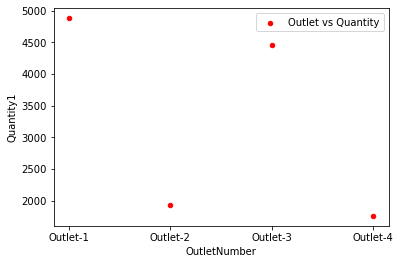

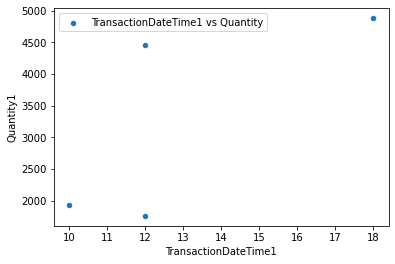

In [42]:
# Visual representation of data
ax = c1.plot(kind= 'scatter', x = 'OutletNumber', y = 'Quantity1', color = 'r', label ='Outlet vs Quantity') 
c1.plot(kind = 'scatter', x = 'TransactionDateTime1', y = 'Quantity1', label = 'TransactionDateTime1 vs Quantity')

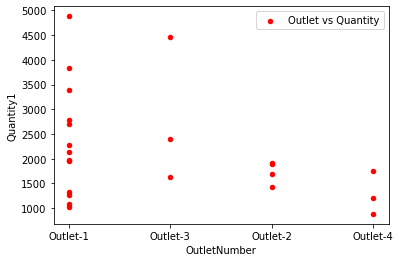

In [43]:
c.plot(kind= 'scatter', x = 'OutletNumber', y = 'Quantity1', color = 'r', label ='Outlet vs Quantity')

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [60]:
# Combining the data from 4 different trade areas of maximum volume on peak hour per month
frames = [c1, t2.c2, t3.c3, t4.c4]
trade = pd.concat(frames)

In [47]:
print('Trade Area Combined Peak Hour Sale Median:',trade['Quantity1'].median()) # Calculating Median
trade.head(15)

Trade Area Combined Peak Hour Sale Median: 3284.58


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-1,13,4883.22,18
1,Outlet-2,6,1923.06,10
2,Outlet-3,6,4456.82,12
3,Outlet-4,1,1757.12,12
0,Outlet-a,5,3047.78,12
1,Outlet-b,6,3482.51,19
2,Outlet-c,4,4311.29,10
0,Outlet-o,2,3004.25,9
1,Outlet-p,2,1552.31,11
2,Outlet-q,2,4582.10,13


In [48]:
# Intitialized data for k-means clustering
x = trade.iloc[:, [1, 2, 3]].values
kmean = KMeans(n_clusters=3)

[[1.30000e+01 4.88322e+03 1.80000e+01]
 [6.00000e+00 1.92306e+03 1.00000e+01]
 [6.00000e+00 4.45682e+03 1.20000e+01]
 [1.00000e+00 1.75712e+03 1.20000e+01]
 [5.00000e+00 3.04778e+03 1.20000e+01]
 [6.00000e+00 3.48251e+03 1.90000e+01]
 [4.00000e+00 4.31129e+03 1.00000e+01]
 [2.00000e+00 3.00425e+03 9.00000e+00]
 [2.00000e+00 1.55231e+03 1.10000e+01]
 [2.00000e+00 4.58210e+03 1.30000e+01]
 [1.00000e+01 3.28458e+03 1.10000e+01]
 [6.00000e+00 2.51897e+03 1.40000e+01]
 [2.00000e+00 3.28708e+03 1.00000e+01]]


In [49]:
x.shape
y_kmeans = kmean.fit_predict(x) # Categorised the clusters 
print(y_kmeans)

[1 2 1 2 0 0 1 0 2 1 0 0 0]


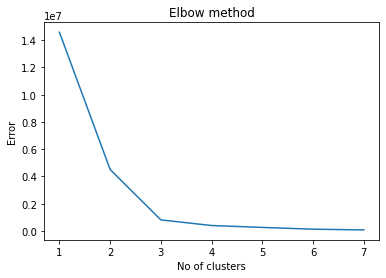

In [50]:
# Elbow Method to determine the number of clusters
Error =[]
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 8), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Text(0, 0.5, 'Quantity')

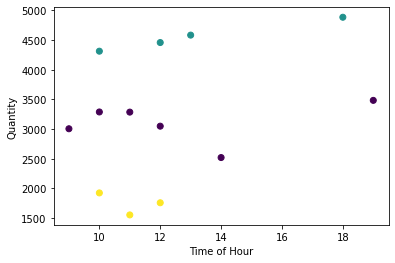

In [51]:
plt.scatter(x[:, 2], x[:, 1], c = y_kmeans) # clustered data plot
plt.xlabel('Time of Hour')
plt.ylabel('Quantity')

In [52]:
print('****Outlet-1 Median:',ot1['Quantity1'].median()) # Individual Outlet Median
ot1.head(13)

****Outlet-1 Median: 2140.4899999999993


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-1,1,3828.50,11
1,Outlet-1,4,1029.68,11
2,Outlet-1,8,1336.04,11
3,Outlet-1,13,4883.22,18
4,Outlet-1,16,3391.72,18
5,Outlet-1,17,2777.75,12
6,Outlet-1,20,1076.25,18
7,Outlet-1,21,1263.44,11
8,Outlet-1,24,2140.49,12
9,Outlet-1,26,2283.26,22


In [53]:
print('****Outlet-2 Median',ot2['Quantity1'].median()) # Individual Outlet Median
ot2.head(4)

****Outlet-2 Median 1791.979999999995


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
13,Outlet-2,2,1694.12,13
14,Outlet-2,3,1431.43,11
15,Outlet-2,6,1923.06,10
16,Outlet-2,7,1889.84,10


In [54]:
print('****Outlet-3',ot3['Quantity1'].median()) # Individual Outlet Median
ot3.head(3)

****Outlet-3 2390.449999999999


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
17,Outlet-3,1,2390.45,11
18,Outlet-3,3,1626.40,12
19,Outlet-3,6,4456.82,12


In [55]:
print('****Outlet-4 Median:',ot4['Quantity1'].median()) # Individual Outlet Median
ot4.head(3)

****Outlet-4 Median: 1203.5999999999985


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
20,Outlet-4,1,1757.12,12
21,Outlet-4,3,883.04,11
22,Outlet-4,5,1203.60,12


In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
ca = c
x = ca.iloc[:, [1, 2, 3]].values
kmean = KMeans(n_clusters=3)
y_kmeans = kmean.fit_predict(x) # Categorised the clusters 
print(y_kmeans)

[1 2 2 1 1 0 2 2 0 0 0 0 0 2 2 0 0 0 2 1 0 2 2]


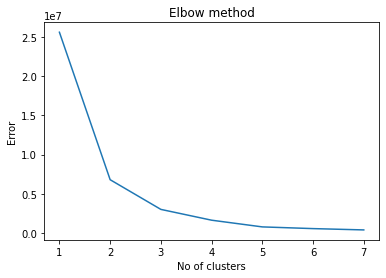

In [16]:
Error =[]
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 8), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Text(0, 0.5, 'Quantity')

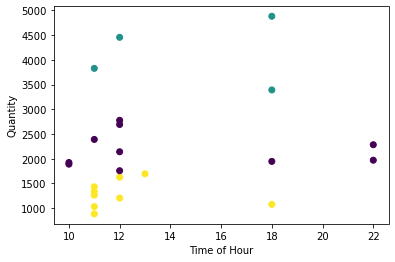

In [21]:
plt.scatter(x = ca['TransactionDateTime1'], y = ca['Quantity1'], c = y_kmeans) # clustered data plot
plt.xlabel('Time of Hour')
plt.ylabel('Quantity')

In [22]:
ca.sort_values(['Quantity1'], ascending = False)

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
3,Outlet-1,13,4883.22,18
19,Outlet-3,6,4456.82,12
0,Outlet-1,1,3828.50,11
4,Outlet-1,16,3391.72,18
5,Outlet-1,17,2777.75,12
10,Outlet-1,27,2693.01,12
17,Outlet-3,1,2390.45,11
9,Outlet-1,26,2283.26,22
8,Outlet-1,24,2140.49,12
11,Outlet-1,29,1970.23,22


In [23]:
print('Mean:',ca['Quantity1'].mean())
print('Median:',ca['Quantity1'].median())

Mean: 2168.4921739130405
Median: 1923.0599999999984


In [27]:
cb = ca.loc[ca['Quantity1'] > 1923.05]

In [33]:
cd = cb.groupby([cb['OutletNumber']])['OutletNumber'].count()

In [38]:
cd.idxmax(axis = 0)

'Outlet-1'